# Pipeline
The aim is to determine what path / logic we can follow in order to create some stories.

During the zoom call of November 7th. we determined that it would be more enjoyable to follow the following path:

## From movies to statistics !
We first have to define an "entry point", which could have been a name, a set of names, a movie or a set of movies.
Having a starting set of movies with computed in advance results seemed more enjoyable and a better story, since not all names would have reflected results (i.e putting a textbox for the user to enter his name would have lead to a lot of negative results -> not enjoyable)

So, the main idea is:
- Find a fix number of movies were we can clearly show an impact on some names (In order to make it as much interactive as possible, it would be nice to have at least 20-40 of them)
- Clicking on a movie would show information on the name, the country, etc... (time line with the bump clearly shown)

(This is for the interactive part, for the more static part were we just compute resutls, we can answer lots of question in addition to that)

## How do we find that ?

- Trying to test all the ~40000 entries would take way too much time -> we could try to keep only the top 50 by year according to the revenue.
- Once we have some movies, we have to find which of them has actually and impact -> extract the name of the characters of those movies
- For each extracted name, we can start the computation that are described in next section
- Once we have the data, we need to fine a way to determine if the result is good enough (TODO)
- Present those movies nicely and get some interactive features 

## Name distribution analysis
The names are distributed on a time-range and want we basically want to now is if the "trend" has changed around a specific date.
I found 2 main methods to do so:
### 1. Interrupted time series (ITS)
You define a date of interest, and only keep the data that happened before this point of time.
Then, you use a machine learning model that predicts how the distribution should have evolved in the following years.
Since you have the data, you can compare what was estimed by the model and what actually happend and thus see an impact or not of the point in time.

TODO: Find a way to measure how well this works -> quantify if the difference is big enough to make it valid

### 2. Slope analysis
This might need more research, but it's a more analystical approach where we study the slope change of the distribution and check wheter the movie is at a local minimum.


# Showcase of the names dataset cleaning
## US

In [1]:
# imports my code from the file src/data/names_data.py
import src.data.names_data as NamesData

usNames = NamesData.USNamesData("US", "babyNamesUSYOB-full.csv")
usNames.clean_raw_data()
usNames.clean_df.head()
usNames.write_clean_data()

US : loaded 1858689 rows !
US : Data is clean and conforms to the expected structure !
US : Data is clean and conforms to the expected structure !
US : Clean data has been and saved to data/clean/names/babyNamesUSYOB-full.csv! (1858689 rows)


## UK

In [2]:
ukNames = NamesData.UKNamesData("UK", "ukbabynames_datasets/ukbabynames.csv")
ukNames.raw_df.head()

UK : loaded 565817 rows !


,year,sex,name,n,rank,nation
0,1996.0,F,SOPHIE,7087.0,1.0,England & Wales
1,1996.0,F,CHLOE,6824.0,2.0,England & Wales
2,1996.0,F,JESSICA,6711.0,3.0,England & Wales
3,1996.0,F,EMILY,6415.0,4.0,England & Wales
4,1996.0,F,LAUREN,6299.0,5.0,England & Wales


In [3]:
# print duplicated rows
ukNames.clean_raw_data()
ukNames.clean_df.head()

UK : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1974,AALIA,F,1
1,1974,AAMIR,M,1
2,1974,AARON,M,17
3,1974,ABADAH,F,1
4,1974,ABBEY,F,1


In [4]:
ukNames.pipeline()

UK : loaded 565817 rows !
UK : Data is clean and conforms to the expected structure !
UK : Data is clean and conforms to the expected structure !
UK : File name has been changed to ukbabynames.csv (we don't want directories in the clean folder)
UK : Clean data has been and saved to data/clean/names/ukbabynames.csv! (446642 rows)


In [5]:
frenchNames = NamesData.FranceNamesData("France", "france.csv", "https://www.insee.fr/fr/statistiques/8205621?sommaire=8205628#dictionnaire", ";")
frenchNames.raw_df.head()

France : loaded 3884324 rows !


,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,38
2,1,AADEL,XXXX,XX,56
3,1,AADHIRAN,2023,93,5
4,1,AADHIRAN,XXXX,XX,15


In [6]:
frenchNames.clean_raw_data()
frenchNames.clean_df.head()

France : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1900,ABEL,M,382
1,1900,MARIE-ANNE,F,42
2,1900,MARIE-ANTOINETTE,F,61
3,1900,MARIE-EUGENIE,F,3
4,1900,MARIE-FRANCOISE,F,20


In [7]:
frenchNames.pipeline()

France : loaded 3884324 rows !
France : Data is clean and conforms to the expected structure !
France : Data is clean and conforms to the expected structure !
France : Clean data has been and saved to data/clean/names/france.csv! (265468 rows)


## Merging two ore more data classes 

In [8]:
from src.utils.names_utils import *
data = [usNames, ukNames, frenchNames]
merged = merge_names_data(data)

merged().head() # When we call the data name object, it returns the cleaned data

US : Data is clean and conforms to the expected structure !
UK : Data is clean and conforms to the expected structure !
France : Data is clean and conforms to the expected structure !
US & UK & France : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1880,AARON,M,102
1,1880,AB,M,5
2,1880,ABBIE,F,71
3,1880,ABBOTT,M,5
4,1880,ABBY,F,6


In [9]:
merged.write_clean_data()
print("The combined data contains ", len(merged.clean_df), " rows")

US & UK & France : Data is clean and conforms to the expected structure !
US & UK & France : Clean data has been and saved to data/clean/names/US_UK_France.csv! (2227359 rows)
The combined data contains  2227359  rows


/home/jeremy/miniconda3/envs/ada/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


US : Data is clean and conforms to the expected structure !


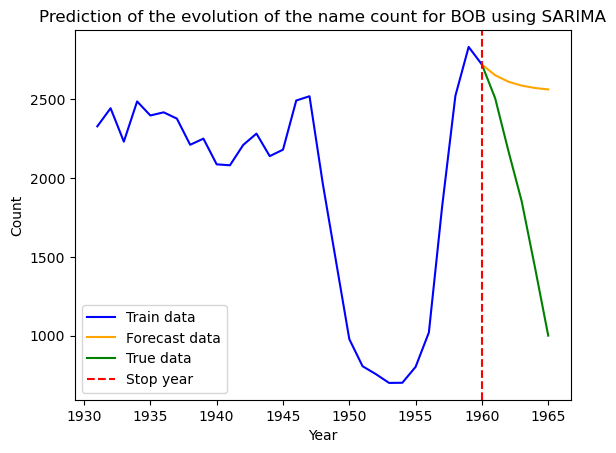

,Year,Predicted Count,True Count
0,1961,2652.218215,2506
1,1962,2611.197051,2171
2,1963,2586.371267,1852
3,1964,2571.346840,1433
4,1965,2562.254138,1000


In [10]:
from src.models.naming_prediction import predict_naming_ARIMA, predict_naming_prophet

predict_naming_ARIMA(usNames, "BOB", 1960, 5, True)


US : Data is clean and conforms to the expected structure !


10:46:52 - cmdstanpy - INFO - Chain [1] start processing
10:46:52 - cmdstanpy - INFO - Chain [1] done processing


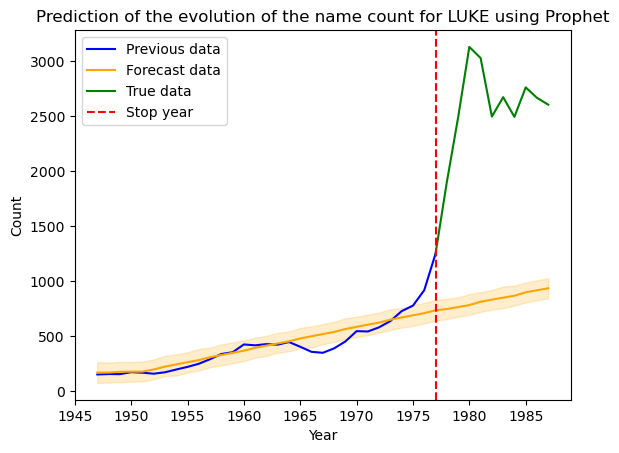

,Year,Predicted Count,yhat_lower,yhat_upper
99,1978-12-31,763.855135,676.484249,852.361925
100,1979-12-31,781.656335,693.334577,880.523082
101,1980-12-31,812.556283,719.935307,899.968281
102,1981-12-31,831.056899,741.692392,919.481889
103,1982-12-31,849.197489,753.267842,950.607081
104,1983-12-31,866.998689,777.089000,959.191016
105,1984-12-31,897.898637,806.162220,987.206143
106,1985-12-31,916.399253,826.515211,1006.983128
107,1986-12-31,934.539843,843.986228,1026.099385


In [11]:
predict_naming_prophet(usNames, "LUKE", 1977, 10, True)